# Dataset for search assesment

Build on top of wikiped pages

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
import urllib.request
import json

## 1. Get the data

In [3]:
url = 'http://island.ricerca.di.unimi.it/~alfio/shared/inforet/wikipeople.json'
data = urllib.request.urlopen(url).read()

In [4]:
D = json.loads(data)

In [5]:
D[0]

{'docid': 'Q868_1',
 'entity': 'Q868',
 'target': 'Aristotle (ancient Greek philosopher)',
 'wikipage': 'https://en.wikipedia.org/wiki/Aristotle',
 'query': 'Aristotle philosopher',
 'document': 'Aristotle (/ærɪsˈtɒtəl/;[3] Greek: Ἀριστοτέλης Aristotélēs, pronounced\xa0[aristotélɛːs]; 384–322\xa0BC) was a Greek philosopher and polymath during the Classical period in Ancient Greece. Taught by Plato, he was the founder of the Lyceum, the Peripatetic school of philosophy, and the Aristotelian tradition. His writings cover many subjects including physics, biology, zoology, metaphysics, logic, ethics, aesthetics, poetry, theatre, music, rhetoric, psychology, linguistics, economics, politics, and government. Aristotle provided a complex synthesis of the various philosophies existing prior to him. It was above all from his teachings that the West inherited its intellectual lexicon, as well as problems and methods of inquiry. As a result, his philosophy has exerted a unique influence on almost

## 2. Example of preparing data

In [6]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

### 2.1 Documents

In [7]:
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
documents = vectorizer.fit_transform([x['document'] for x in D])

### 2.2 Queries

In [8]:
query_texts = list(set([(x['query'], x['entity']) for x in D]))
queries = vectorizer.transform([x[0] for x in query_texts])

In [9]:
print(documents.shape, queries.shape)

(1139, 15716) (33, 15716)


## 3. Show

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
v_docs = pca.fit_transform(documents.toarray())
v_queries = pca.transform(queries.toarray())

In [12]:
target_map = dict([(x['entity'], i) for i, x in enumerate(D)])
target = [target_map[x['entity']] for x in D]
q_target = [target_map[x[1]] for x in query_texts]
q_labels = [x[0] for x in query_texts]

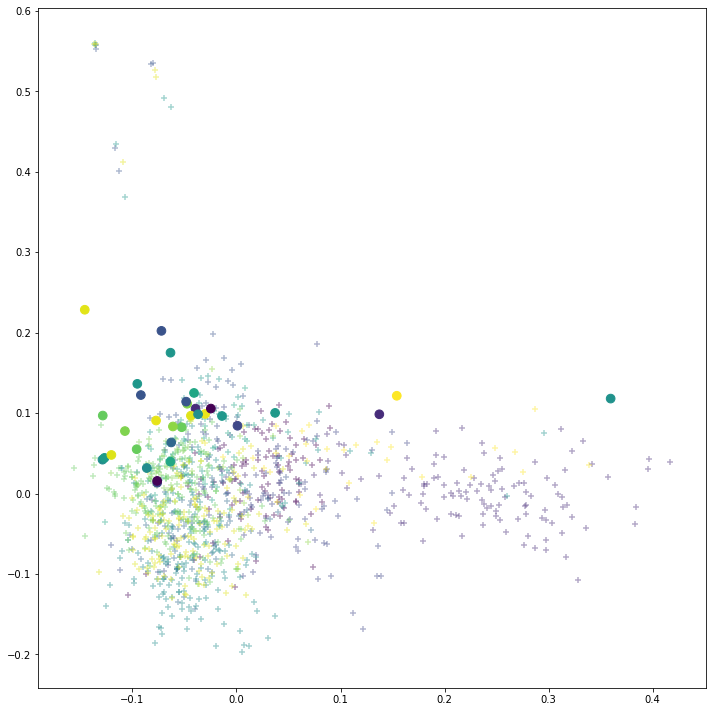

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(v_docs[:, 0], v_docs[:, 1], marker = '+', c = target, alpha = 0.4)
ax.scatter(v_queries[:, 0], v_queries[:, 1], marker = '.', s = 300, c = q_target)
plt.tight_layout()
plt.show()

## 4. Search

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
sigma = cosine_similarity(queries, documents)

In [16]:
Q = 6
print(q_labels[Q], '\n')
for i, w in sorted(enumerate(sigma[Q]), key=lambda x: -x[1]):
    d = D[i]
    print(d['docid'], d['target'], w)
    print(d['document'], '\n')

Napoleon general emperor 

Q517_107 Napoleon (French general and emperor (1769-1821)) 0.23250247093014492
The Allied Powers having declared that Emperor Napoleon was the sole obstacle to the restoration of peace in Europe, Emperor Napoleon, faithful to his oath, declares that he renounces, for himself and his heirs, the thrones of France and Italy, and that there is no personal sacrifice, even that of his life, which he is not ready to make in the interests of France.Done in the palace of Fontainebleau, 11 April 1814. 

Q1632158_27 Napoléon (1927 film by Abel Gance) 0.18908339073339062
In his army office, Napoleon tells 14-year-old Eugène de Beauharnais (Georges Hénin) that he can keep his executed father's sword. The next day, Joséphine arrives with Eugène to thank Napoleon for this kindness to her only son. The general staff officers wait for hours while Napoleon clumsily tries to convey his feelings for Joséphine. Later, Napoleon practises his amorous style under the guidance of his

With the loss of the study of ancient Greek in the early medieval Latin West, Aristotle was practically unknown there from c. AD 600 to c. 1100 except through the Latin translation of the Organon made by Boethius. In the twelfth and thirteenth centuries, interest in Aristotle revived and Latin Christians had translations made, both from Arabic translations, such as those by Gerard of Cremona,[154] and from the original Greek, such as those by James of Venice and William of Moerbeke. After the Scholastic Thomas Aquinas wrote his Summa Theologica, working from Moerbeke's translations and calling Aristotle "The Philosopher",[155] the demand for Aristotle's writings grew, and the Greek manuscripts returned to the West, stimulating a revival of Aristotelianism in Europe that continued into the Renaissance.[156] These thinkers blended Aristotelian philosophy with Christianity, bringing the thought of Ancient Greece into the Middle Ages. Scholars such as Boethius, Peter Abelard, and John Buri

Q9458_87 Muhammad (Arabian religious leader and the founder of Islam) 0.0
Khadijah is said to have had four daughters with Muhammad (Ruqayyah bint Muhammad, Umm Kulthum bint Muhammad, Zainab bint Muhammad, Fatimah Zahra) and two sons (Abd-Allah ibn Muhammad and Qasim ibn Muhammad, who both died in childhood). All but one of his daughters, Fatimah, died before him.[248] Some Shi'a scholars contend that Fatimah was Muhammad's only daughter.[249] Maria al-Qibtiyya bore him a son named Ibrahim ibn Muhammad, but the child died when he was two years old.[248]
 

Q9458_89 Muhammad (Arabian religious leader and the founder of Islam) 0.0
Muhammad's descendants through Fatimah are known as sharifs, syeds or sayyids. These are honorific titles in Arabic, sharif meaning 'noble' and sayed or sayyid meaning 'lord' or 'sir'. As Muhammad's only descendants, they are respected by both Sunni and Shi'a, though the Shi'a place much more emphasis and value on their distinction.[250]
 

Q9458_90 Muhammad (A


Q8016_91 Winston Churchill (British statesman, army officer, and writer (1874–1965)) 0.0
While he was away, the Eighth Army, having already relieved the Siege of Tobruk, had pursued Operation Crusader against Rommel's forces in Libya, successfully driving them back to a defensive position at El Agheila in Cyrenaica. On 21 January 1942, however, Rommel launched a surprise counter-attack which drove the Allies back to Gazala.
 

Q8016_92 Winston Churchill (British statesman, army officer, and writer (1874–1965)) 0.0
Elsewhere, recent British success in the Battle of the Atlantic was compromised by the Kriegsmarine's introduction of its M4 4-rotor Enigma, whose signals could not be deciphered by Bletchley Park for nearly a year.[328] In the Far East, the news was much worse with Japanese advances in all theatres, especially at sea and in Malaya. At a press conference in Washington, Churchill had to play down his increasing doubts about the security of Singapore.[329]
 

Q8016_93 Winston 

 

Q517_19 Napoleon (French general and emperor (1769-1821)) 0.0
The French army carried out Bonaparte's plan in the Battle of Saorgio in April 1794, and then advanced to seize Ormea in the mountains. From Ormea, they headed west to outflank the Austro-Sardinian positions around Saorge. After this campaign, Augustin Robespierre sent Bonaparte on a mission to the Republic of Genoa to determine that country's intentions towards France.[46]
 

Q517_21 Napoleon (French general and emperor (1769-1821)) 0.0
By 1795, Bonaparte had become engaged to Désirée Clary, daughter of François Clary. Désirée's sister Julie Clary had married Bonaparte's elder brother Joseph.[50] In April 1795, he was assigned to the Army of the West, which was engaged in the War in the Vendée—a civil war and royalist counter-revolution in Vendée, a region in west central France on the Atlantic Ocean. As an infantry command, it was a demotion from artillery general—for which the army already had a full quota—and he plead

 

Q575248_21 Jesus (1979 film by Peter Sykes, John Krish) 0.0
The version was promoted to Muslims of Iraq during the hardships of the Iraqi War, where its website featured a banner advert that said "Send videocassettes of 'JESUS' to Iraq". The 2003 version premiered in a politically unstable and fundamentally Islamic region in northern Egypt. Documentary-maker Deep Sehgal filmed the screening as part of a six-month project.[6]
 

Q575248_22 Jesus (1979 film by Peter Sykes, John Krish) 0.0
To celebrate the 35th anniversary of the film's release, a digitally remastered, high definition DVD and Blu-ray version was released in April 2014, with its 173,000 frames being retouched and re-colored.[19] Featuring a new musical score by John Bisharat and Dolby Digital 5.1 sound, all of the voices in the film were dubbed over by unknown British voice actors, though Brian Deacon returned to do the voice-over for Jesus.[20] With a running time of 128 minutes, the remastered version contains languag

In [17]:
def search(Q):
    qt, qe = query_texts[Q]
    answers = [(D[i]['entity'], w) for i, w in sorted(enumerate(sigma[Q]), key = lambda x: -x[1])]
    y_pred, scores = [], []
    for e, score in answers: 
        if e == qe: 
            y_pred.append(1)
        else:
            y_pred.append(0)
        scores.append(score)
    return y_pred, scores

In [18]:
y, s = search(1)

In [19]:
from sklearn.metrics import precision_recall_curve

In [20]:
precision, recall, thresholds = precision_recall_curve(y, s)

In [21]:
precision

array([0.06584723, 0.48979592, 0.49315068, 0.49655172, 0.5       ,
       0.5034965 , 0.50704225, 0.5106383 , 0.51428571, 0.51798561,
       0.51449275, 0.51824818, 0.51470588, 0.51851852, 0.52238806,
       0.52631579, 0.53030303, 0.53435115, 0.53076923, 0.53488372,
       0.5390625 , 0.54330709, 0.53968254, 0.544     , 0.5483871 ,
       0.55284553, 0.55737705, 0.56198347, 0.56666667, 0.57142857,
       0.56779661, 0.56410256, 0.56034483, 0.56521739, 0.57017544,
       0.57522124, 0.58035714, 0.58558559, 0.58181818, 0.58715596,
       0.59259259, 0.59813084, 0.60377358, 0.60952381, 0.61538462,
       0.62135922, 0.62745098, 0.63366337, 0.64      , 0.64646465,
       0.64285714, 0.64948454, 0.65625   , 0.65263158, 0.65957447,
       0.66666667, 0.67391304, 0.68131868, 0.68888889, 0.68539326,
       0.68181818, 0.68965517, 0.69767442, 0.69411765, 0.69047619,
       0.69879518, 0.70731707, 0.7037037 , 0.7       , 0.70886076,
       0.70512821, 0.71428571, 0.72368421, 0.72      , 0.71621

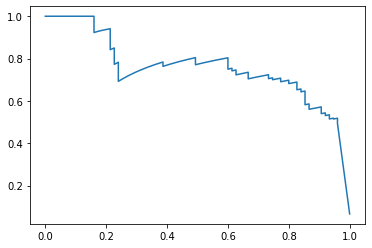

In [22]:
fig, ax = plt.subplots()
ax.plot(recall, precision)

plt.show()